# Metric 4: Availability of Bike Lanes

Another way we plan on assessing which Pittsburgh neighborhood is the best is through the availability of bike lanes

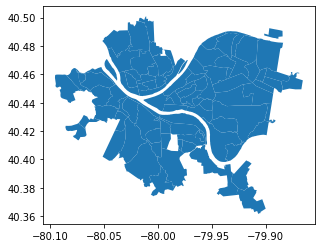

In [2]:
import pandas as pd
import geopandas
neighborhoods = geopandas.read_file('Neighborhoods_.shp')
neighborhoods.plot()

First I created a map of the Pittsburgh neighborhoods which will be filled in with data from the bike lanes shape files

In [3]:
bike_lanes = geopandas.read_file('Bike Lanes.shp')
bike_lanes

,Id,BLName,BLDist,Year_Added,BikeInfDis,Note,CrossSt,SLMDist,RBL,RS,YearTot,BL_SYearTo,geometry
0,0,6th St.,0.091321,2015,0.10,Bike Lane,Penn to Bridge,0.00,None,None,6.18,None,"LINESTRING (1341574.500 412596.500, 1341718.25..."
1,0,Federal St./6th St.,0.060651,2015/2016,0.30,Bike Lane,Bridge to Isabella/North to Hemlock,0.00,None,None,None,4.38,"LINESTRING (1341233.904 413928.936, 1341305.25..."
2,0,Schenley Drive,0.108539,None,0.00,Bike Lane,None,0.00,None,None,None,None,"LINESTRING (1355480.000 411449.000, 1355377.25..."
3,0,S Bouquet St.,0.176892,2013,0.22,Bike Lane,None,0.00,None,None,5.97,None,"LINESTRING (1354430.000 411526.250, 1355172.00..."
4,0,Biglow Blvd (Fifth to Parkman),0.122549,None,0.00,Bike Lane,None,0.00,None,None,None,None,"LINESTRING (1354915.250 412414.000, 1354480.50..."
5,0,O'Hara St to Bayard St.,0.777993,2015,1.60,Bike Lane,DeSoto to Morewood,0.00,None,None,None,None,"LINESTRING (1353483.750 411986.500, 1353759.77..."
6,0,Neville St.,0.169582,2012,0.23,Bike Lane,Fifth to Near Ellsworth,0.00,None,None,None,None,"LINESTRING (1356742.750 414232.750, 1357006.93..."
7,0,East St.,1.458084,2015/2016,3.60,Bike Lane,DeSoto to Morewood/Suffolk to Mt Pleasant,0.00,None,None,None,None,"LINESTRING (1341022.250 426591.000, 1341057.00..."
8,0,Rankin Bridge,0.479848,None,0.00,Bike Lane,None,0.00,None,None,None,None,"LINESTRING (1374578.000 397194.250, 1376346.25..."
9,0,Brereton St.,0.167146,2013,0.30,Bike Lane,Penn to Dobson,0.00,None,None,None,2.34,"LINESTRING (1349952.802 416617.882, 1350089.50..."


Above is the data that will be used to map bike lane availability in the Pittsburgh neighborhoods

<AxesSubplot: >

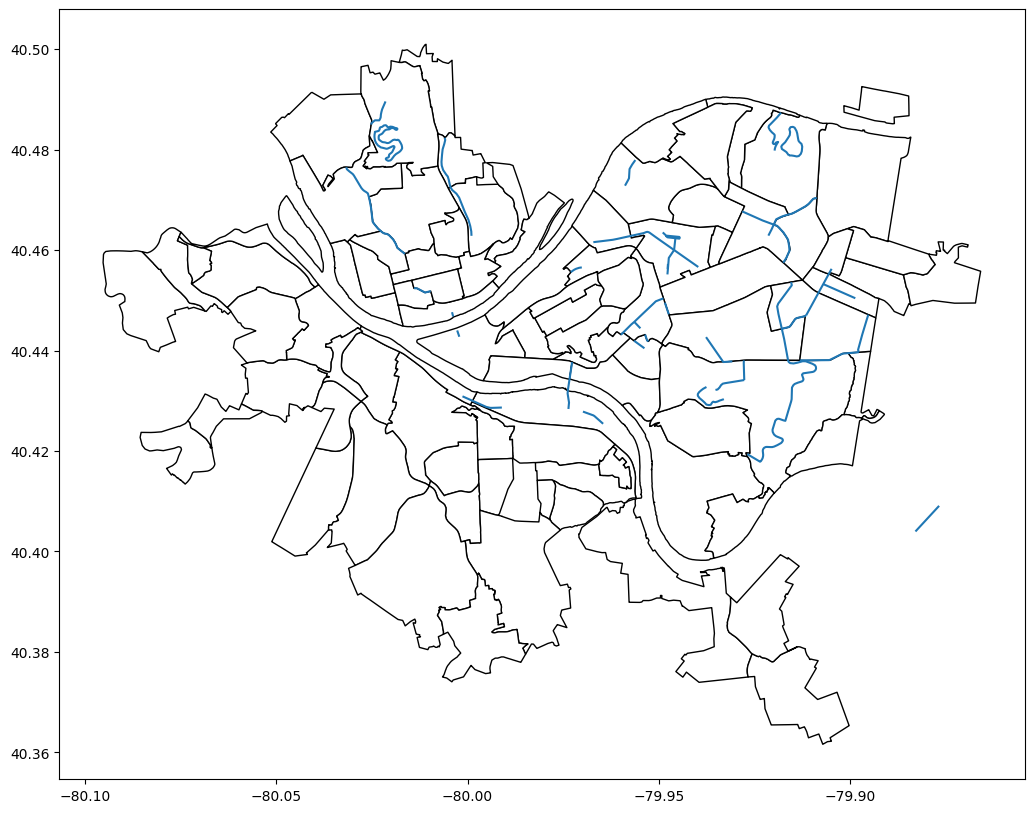

In [32]:
bike_lanes = geopandas.read_file('Bike Lanes.shp')
bike_lanes = bike_lanes.to_crs(neighborhoods.crs)
base = neighborhoods.plot(color='white', edgecolor='black', figsize=(15,10))
bike_lanes
bike_lanes.plot(ax=base, markersize=5)

Now, each bike lane present in the data can be shown on the map of Pittsburgh neighborhoods

<AxesSubplot: >

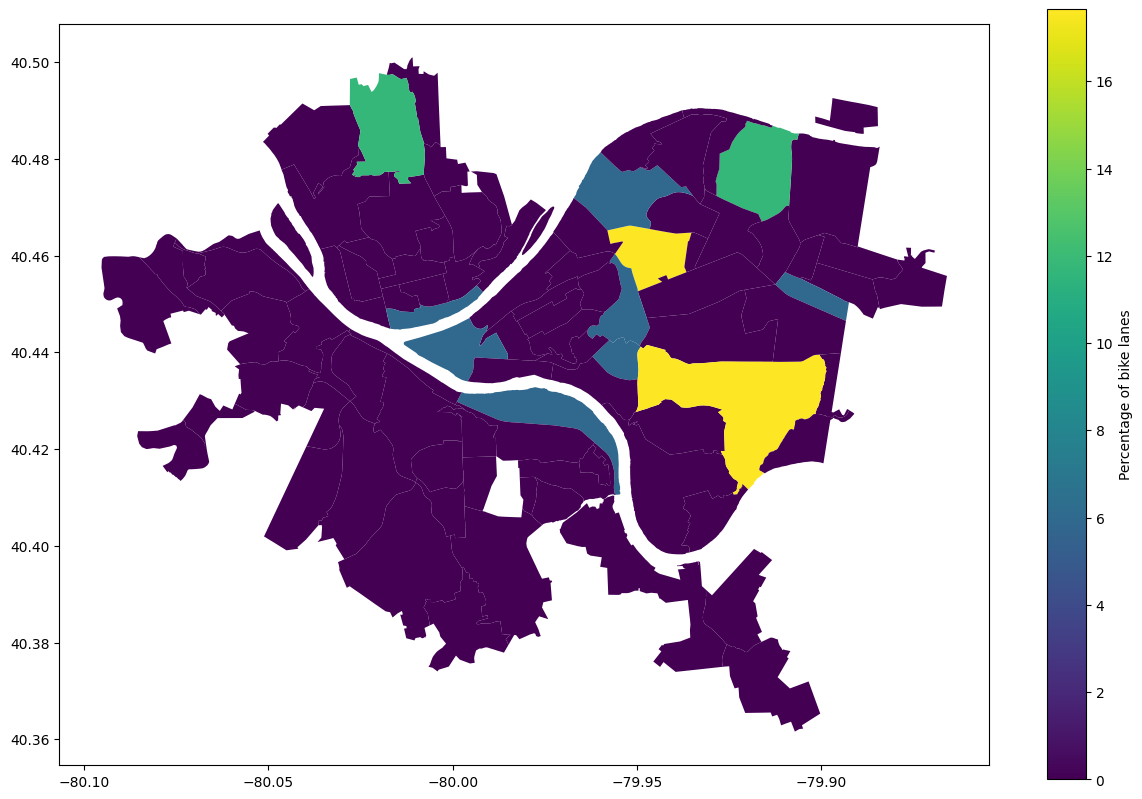

In [36]:
data = {}
for shape, objectid in zip(neighborhoods['geometry'], neighborhoods['objectid']):
	for line in bike_lanes['geometry']:
		if shape.contains(line):
			if objectid in data:
				data[objectid] += 1
			else:
				data[objectid] = 1
		else:
			if objectid not in data:
				data[objectid] = 0
total_bike_lanes = sum(list(data.values()))
for key in data.keys():
	data[key] = (data[key] / total_bike_lanes) * 100
df_details = {
	'objectid': list(data.keys()),
	'percent_total_bike_lanes': list(data.values())
}
df = pd.DataFrame(df_details)
merged_df = neighborhoods.merge(df, how='left', left_on='objectid', right_on='objectid')
merged_df.plot(column='percent_total_bike_lanes', legend=True, figsize=(15,10), legend_kwds={'label': 'Percentage of bike lanes'})


This map shows what precentage of Pittsburgh's bike lanes each neighborhood has, The lighter the neighborhood, the more bike lanes are present.